In [ ]:
# Bước 1: Import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập kiểu hiển thị mặc định cho seaborn và matplotlib
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Bước 2: Đọc dữ liệu từ file CSV (giả sử bạn có file data.csv)
df = pd.read_csv("../data/processed/processed_data_1.csv")

# Hiển thị 5 dòng đầu tiên
df.head()

In [ ]:
# Bước 3: Kiểm tra thông tin tổng quan dữ liệu
df.info()
df.describe()

In [ ]:
# Bước 4: Chuyển đổi cột ngày tháng thành định dạng datetime
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.set_index('date', inplace=True)

# Bước 5: Biểu đồ số lượng khách theo thời gian
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='date', y='number_of_guests')
plt.title("Số lượng khách theo thời gian")
plt.xlabel("Ngày")
plt.ylabel("Số khách")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Bước 6: Trung bình số khách theo thứ trong tuần
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)

sns.barplot(data=df, x='day_of_week', y='number_of_guests')
plt.title("Trung bình số khách theo thứ trong tuần")
plt.xlabel("Thứ")
plt.ylabel("Số khách trung bình")
plt.show()

In [ ]:
# Bước 7: Số khách theo điều kiện thời tiết
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='weather_condition', y='number_of_guests')
plt.title("Phân phối số khách theo điều kiện thời tiết")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Bước 8: Mối tương quan giữa nhiệt độ và số khách
sns.scatterplot(data=df, x='temperature', y='number_of_guests', hue='weather_condition')
plt.title("Mối tương quan giữa nhiệt độ và số khách")
plt.xlabel("Nhiệt độ")
plt.ylabel("Số khách")
plt.show()

In [ ]:
# Bước 9: Ảnh hưởng của ngày lễ và voucher
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(data=df, x='is_holiday', y='number_of_guests', ax=axes[0])
axes[0].set_title("Ảnh hưởng của ngày lễ")

sns.boxplot(data=df, x='voucher_active', y='number_of_guests', ax=axes[1])
axes[1].set_title("Ảnh hưởng của khuyến mãi")

plt.tight_layout()
plt.show()

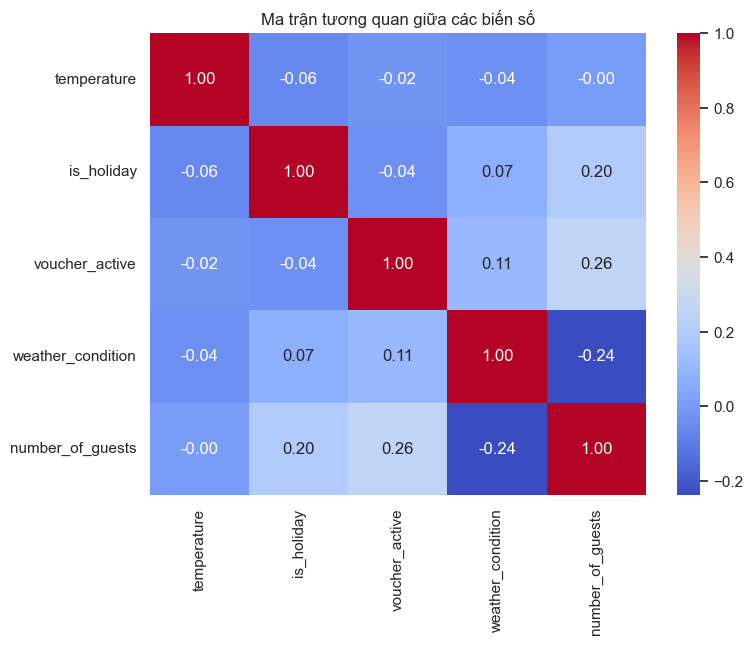

In [12]:
# Bước 10: Heatmap mối tương quan giữa các biến số
import numpy as np

# Chuyển các biến phân loại sang dạng số (nếu cần)
df_encoded = df.copy()

# Ánh xạ các cột phân loại thành số
df_encoded['is_holiday'] = df_encoded['is_holiday'].astype(int)
df_encoded['voucher_active'] = df_encoded['voucher_active'].astype(int)

# Nếu weather_condition là dạng text, mã hóa đơn giản
df_encoded['weather_condition'] = df_encoded['weather_condition'].astype('category').cat.codes

# Chọn các cột số để vẽ heatmap
numeric_cols = ['temperature', 'is_holiday', 'voucher_active', 'weather_condition', 'number_of_guests']
corr = df_encoded[numeric_cols].corr()

# Vẽ heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan giữa các biến số")
plt.show()